In [18]:
import sys
print(sys.version)


3.8.10 (v3.8.10:3d8993a744, May  3 2021, 09:09:08) 
[Clang 12.0.5 (clang-1205.0.22.9)]


In [19]:
%pip install --upgrade pip setuptools wheel


Note: you may need to restart the kernel to use updated packages.


In [20]:
%pip install notebook ipykernel


Note: you may need to restart the kernel to use updated packages.


In [21]:
import os

if not os.path.exists("recognize-anything"):
    !git clone https://github.com/xinyu1205/recognize-anything.git
else:
    print("Repo already exists")


Cloning into 'recognize-anything'...
remote: Enumerating objects: 748, done.
remote: Counting objects: 100% (365/365), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 748 (delta 290), reused 206 (delta 206), pack-reused 383 (from 3)
Receiving objects: 100% (748/748), 27.15 MiB | 1.86 MiB/s, done.
Resolving deltas: 100% (397/397), done.


In [22]:
%cd recognize-anything


/Users/akshatsharma/Desktop/PROJECT_BTP/recognize-anything/recognize-anything


In [23]:
%pip install torch torchvision torchaudio
%pip install -r requirements.txt
%pip install timm==0.6.13 opencv-python pillow
os.makedirs("pretrained", exist_ok=True)
os.makedirs("your_images", exist_ok=True)




Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/openai/CLIP.git to /private/var/folders/95/r3xq4g0n6m7brh83zfzmmvfw0000gn/T/pip-install-m4ydokx5/clip_b2d9e0df3c2547daaaed08427b55b5cf
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /private/var/folders/95/r3xq4g0n6m7brh83zfzmmvfw0000gn/T/pip-install-m4ydokx5/clip_b2d9e0df3c2547daaaed08427b55b5cf
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Using cached timm-0.4.12-py3-none-any.whl.metadata (30 kB)
Using cached timm-0.4.12-py3-none-any.whl (376 kB)
  Attempting uninstall: timm
    Found existing installation: timm 0.6.13
    Uninstalling timm-0.6.13:
      Successfully uninstalled timm-0.6.13
Note: you may need to restart the kernel to use updated packages.
  Using cached timm-0.6.13-py3-none-any.whl.metadata (38 kB)
Using cached timm-0.6.13-py3-none-any.wh

In [24]:
%pip install wget
%pip install huggingface_hub


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import os

path = "/Users/akshatsharma/Desktop/PROJECT_BTP/recognize-anything/pretrained/ram_swin_large_14m.pth"
print("Exists:", os.path.exists(path))
print("Size (MB):", os.path.getsize(path) / (1024*1024))


Exists: True
Size (MB): 5365.023495674133


In [29]:
import torch
from PIL import Image
from torchvision import transforms

from ram.models import ram
from ram import inference


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/fairscale/experimental/nn/offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/fairscale/experimental/nn/offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore


In [30]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
print("Using device:", device)


Using device: mps


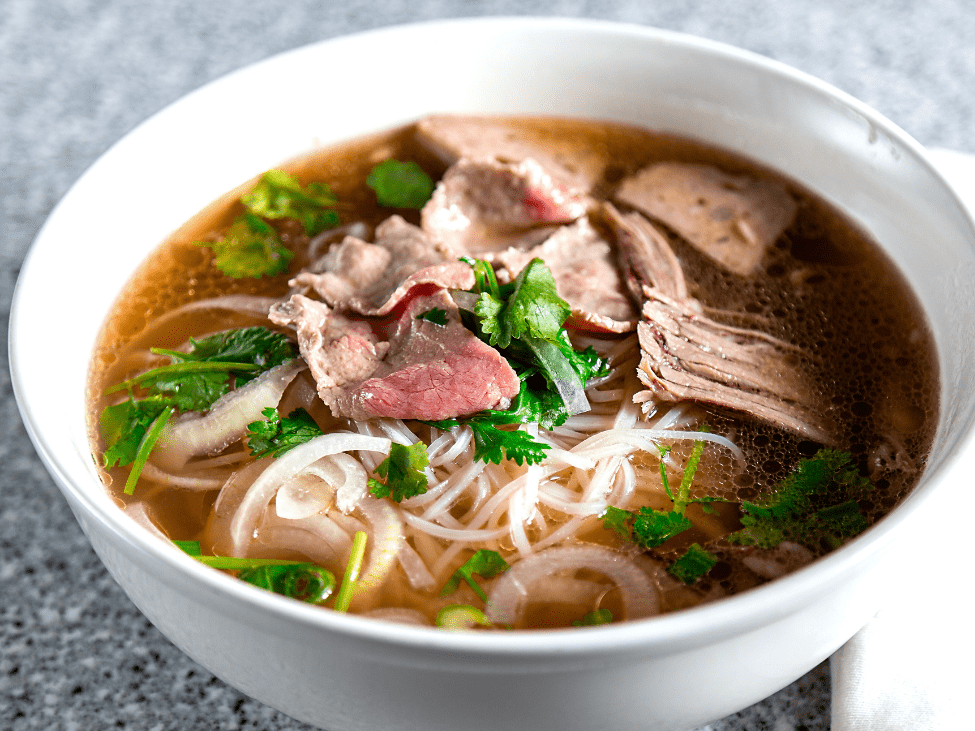

In [33]:
IMAGE_PATH = "/Users/akshatsharma/Desktop/PROJECT_BTP/recognize-anything/your_images/746053_3017fb0a104f47d99a03bc1e6fdf1d6a~mv2.png"

image = Image.open(IMAGE_PATH).convert("RGB")
image


In [34]:
transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

image_tensor = transform(image).unsqueeze(0).to(device)


In [35]:
MODEL_PATH = "/Users/akshatsharma/Desktop/PROJECT_BTP/recognize-anything/pretrained/ram_swin_large_14m.pth"

model = ram(
    pretrained=MODEL_PATH,
    image_size=384,
    vit="swin_l"
)

model.eval()
model = model.to(device)


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: f89b9d6c-fa15-4c63-be04-2342114610c4)')' thrown while requesting HEAD https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].
BertLMHeadModel has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you

/encoder/layer/0/crossattention/self/query is tied
/encoder/layer/0/crossattention/self/key is tied
/encoder/layer/0/crossattention/self/value is tied
/encoder/layer/0/crossattention/output/dense is tied
/encoder/layer/0/crossattention/output/LayerNorm is tied
/encoder/layer/0/intermediate/dense is tied
/encoder/layer/0/output/dense is tied
/encoder/layer/0/output/LayerNorm is tied
/encoder/layer/1/crossattention/self/query is tied
/encoder/layer/1/crossattention/self/key is tied
/encoder/layer/1/crossattention/self/value is tied
/encoder/layer/1/crossattention/output/dense is tied
/encoder/layer/1/crossattention/output/LayerNorm is tied
/encoder/layer/1/intermediate/dense is tied
/encoder/layer/1/output/dense is tied
/encoder/layer/1/output/LayerNorm is tied
--------------
/Users/akshatsharma/Desktop/PROJECT_BTP/recognize-anything/pretrained/ram_swin_large_14m.pth
--------------
load checkpoint from /Users/akshatsharma/Desktop/PROJECT_BTP/recognize-anything/pretrained/ram_swin_large_1

In [37]:
from ram.inference import inference_ram
with torch.no_grad():
    tags = inference_ram(image_tensor, model)

print("Predicted tags:")
print(tags)



Predicted tags:
('beef | bowl | broccoli | broth | table | fill | food | meat | noodle | onion | parsley | pork | soup | stew | vegetable | white', '牛肉  | 碗  | 西兰花  | 肉汤  | 桌子/表格 | 填满 | 食物 | 肉类 | 面条  | 洋葱  | 欧芹/香菜 | 猪肉  | 汤  | 炖 | 蔬菜 | 白色')
